- 1. 技术线最少拟合次数：
检测至少多少次拟合曲线可以代表原始曲线y的走势，通过度量始y值和均线y_roll_mean的距离和原始y值和拟合回归的趋势曲线y_fit的距离的方法，默认使用metrics_rmse
- 2. 技术线最优拟合次数：
寻找多少次多项式拟合回归的趋势曲线可以完美的代表原始曲线y的走势
- 3. 技术线拟合曲线：
通过步长参数在子金融序列中进行走势拟合，形成拟合曲线及上下拟合通道曲线，返回三条拟合曲线，组成拟合通道

In [1]:
import os, copy, sys
os.environ['ULTRON_DATA'] = 'keim'
os.environ['IGNORE_WARNINGS'] = '0'
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from ultron.ump.technical.line import Line

/var/log/ultron/2022-10-03.log


In [3]:
from ultron.env import *

In [4]:
enable_example_env()

2022-10-03 20:22:58,056 - [env.py:81] - ultron - INFO - enable example env will only read /home/kerry/ultron/rom/sandbox/keim


#### 加载行情

In [5]:
market_data = pd.read_csv(os.path.join(g_project_data, 'market_data.csv'), index_col=0)
market_data['trade_date'] = pd.to_datetime(market_data['trade_date'])
market_data = market_data.reset_index().set_index('code').loc['RB'][['trade_date','closePrice']]
market_data = market_data.set_index('trade_date').rename(columns={'closePrice':'close'})

In [6]:
kl_tl = Line(market_data['close'][-252:], 'close')

##### 技术线最少拟合次数

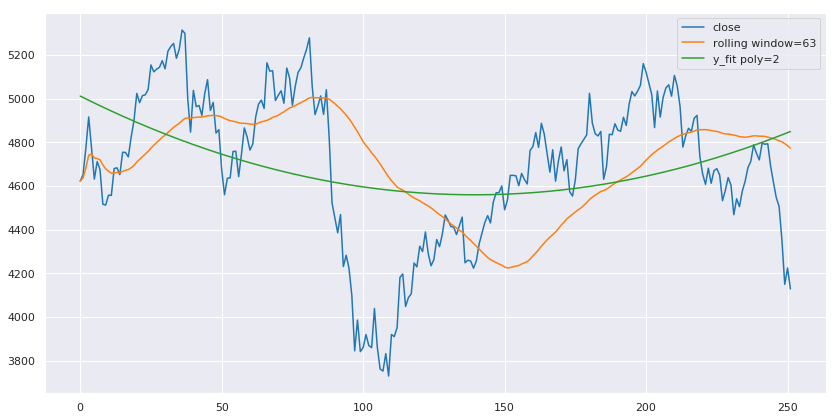

In [7]:
least, rolling_window, y_fit, y_roll_mean, distance_fit, distance_mean = kl_tl.create_least_valid_poly()
y = kl_tl.tl
x = np.arange(0, len(y))
plt.figure(figsize=(14, 7))
plt.plot(x, y)
plt.plot(x, y_roll_mean)
plt.plot(x, y_fit)
plt.legend(['close', 'rolling window={}'.format(rolling_window),
            'y_fit poly={}'.format(least)])
plt.show()

##### 技术线最优拟合次数

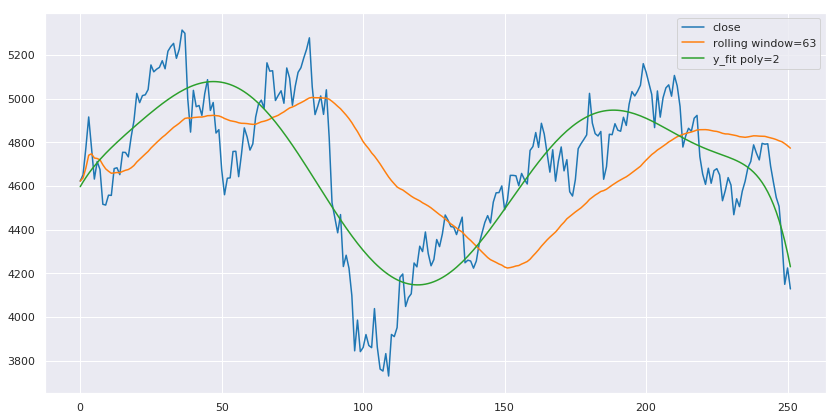

In [8]:
best, rolling_window, y_fit, y_roll_mean, distance_fit, distance_mean = kl_tl.create_best_poly()
y = kl_tl.tl
x = np.arange(0, len(y))
plt.figure(figsize=(14, 7))
plt.plot(x, y)
plt.plot(x, y_roll_mean)
plt.plot(x, y_fit)
plt.legend(['close', 'rolling window={}'.format(rolling_window),
            'y_fit poly={}'.format(least)])
plt.show()

##### 技术线拟合曲线

In [9]:
channel_list = kl_tl.create_regress_trend_channel(step_x=1.0)

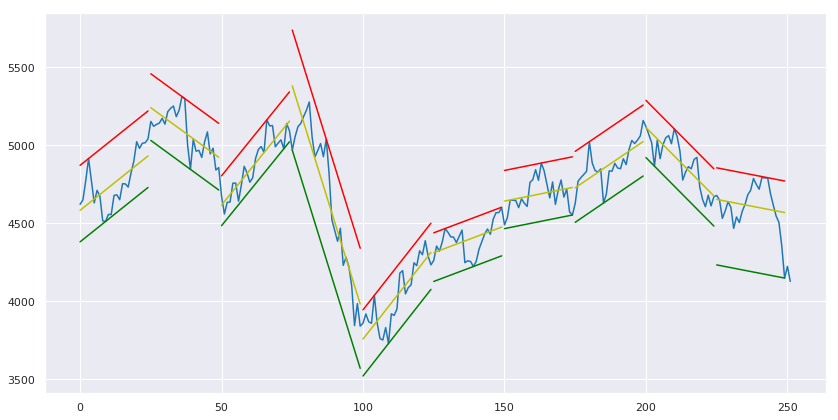

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(kl_tl.tl)
for channel in channel_list:
    plt.plot(channel['x'], channel['y_below'], 'g')
    plt.plot(channel['x'], channel['y_fit'], 'y')
    plt.plot(channel['x'], channel['y_above'], 'r')
plt.show()